**ASSIGNMENT #10 ON SELF ORGANIZING NEURAL NETWORK**










In [1]:
#Importing Necessary Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

**Generating 1500 Training Samples**

In [2]:
trainingSet = np.random.uniform(-1,1,(1500,2))

**Hyper Parameter Initialization , Activation Map & Weight Assignment**

In [3]:
X,Y = 10,10
activationMap = np.zeros((X,Y))
W = np.random.ranf((X,Y,trainingSet.shape[1]))
W = 2*W - 1

In [4]:
#Defining the Neighbourhood Region
neighbourOfX = np.arange(X)
neighbourOfY = np.arange(Y)

In [5]:
epochs = 40000
learningRate = 0.1
decay = epochs/2
sig = 1.0

**Function: to decay the learning rate**

In [6]:
def decayAlpha(noOfIter):
  learningRateTemp = learningRate/(1 + noOfIter/decay)
  return learningRateTemp

**Function: to decay the sigma**

In [7]:
def decaySigma(noOfIter):
  sigmaTemp = sig/(1 + noOfIter/decay)
  return sigmaTemp

**Function: to get the winner vector**

In [8]:
def winningVector(Sample):
  temp = np.subtract(Sample,W)
  var = np.nditer(activationMap,flags = ['multi_index'])
  while not var.finished:
    activationMap[var.multi_index] = np.linalg.norm(temp[var.multi_index])
    var.iternext()

  return np.unravel_index(activationMap.argmin(),activationMap.shape)

**Function: to update the weights**

In [9]:
def updateWinningVector(winnerVector,Sample,noOfIter):
  learningRateDecayed = decayAlpha(noOfIter)
  sigmaDecayed = decaySigma(noOfIter)

  # Getting Neighbourhood around winner vector(Gaussian Function)
  nX = np.exp(-1*np.square(neighbourOfX - winnerVector[0])/(2*np.pi*(sigmaDecayed**2)))
  nY = np.exp(-1*np.square(neighbourOfY - winnerVector[1])/(2*np.pi*(sigmaDecayed**2)))

  neighbour = np.outer(nX,nY)

  var = np.nditer(neighbour,flags = ['multi_index'])
  while not var.finished:
    W[var.multi_index] = W[var.multi_index]+ learningRateDecayed*neighbour[var.multi_index]*(Sample - W[var.multi_index])
    var.iternext()

**TRAINING OF THE MODEL**

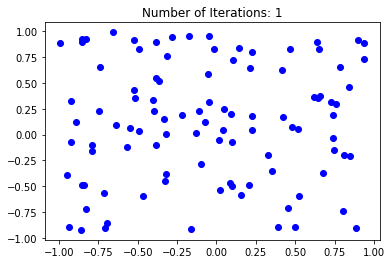

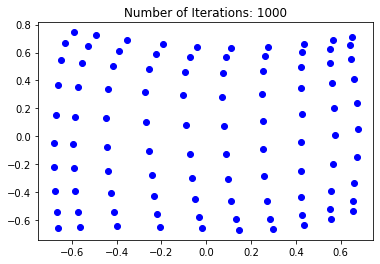

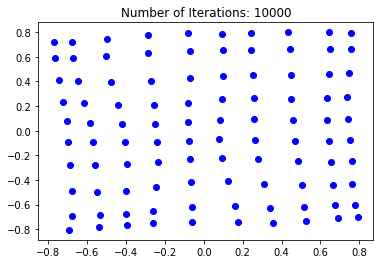

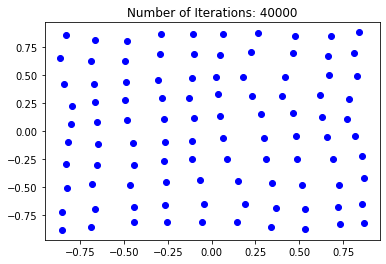

In [10]:
for i in tqdm(range(1,epochs+1)):
  np.random.shuffle(trainingSet)
  index = np.random.randint(0,trainingSet.shape[0])
  winnerVector = winningVector(trainingSet[index])
  updateWinningVector(winnerVector,trainingSet[index],i)

  if i == 1 or i == 1000 or i == 10000 or i == 40000:
    plotX = []
    plotY = []
    for k in range(W.shape[0]):
      for j in range(W.shape[1]):
        plotX.append(W[k][j][0])
        plotY.append(W[k][j][1])

    plt.title('Number of Iterations: '+ str(i) )
    plt.scatter(plotX,plotY,c = 'b')
    plt.show()
    plt.close()   

**TESTING THE MODEL BY GIVEN INPUTS**

********For input 0 Minimum Euclidian distance is : 0.07964111270316684********
*********************The cluster it belongs to is :(9, 5)**********************



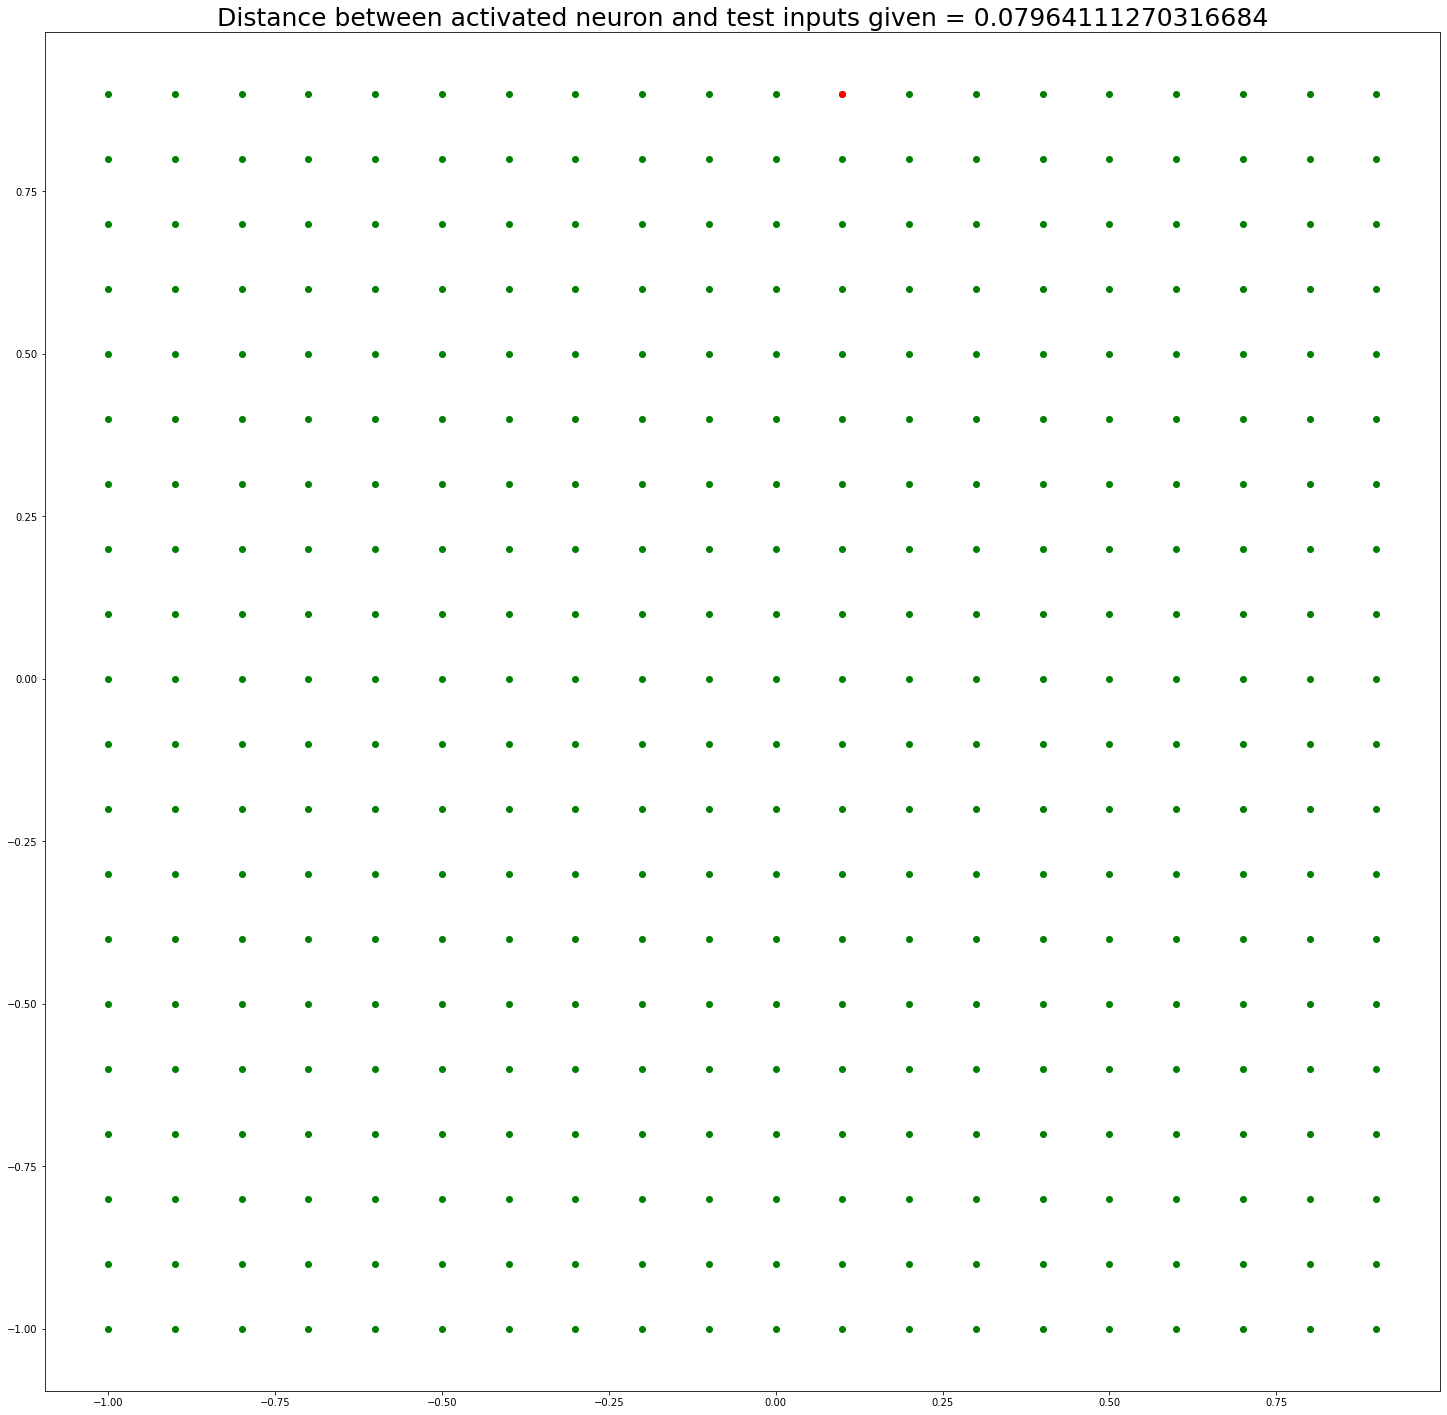

********For input 1 Minimum Euclidian distance is : 0.05480629634227634********
*********************The cluster it belongs to is :(3, 7)**********************



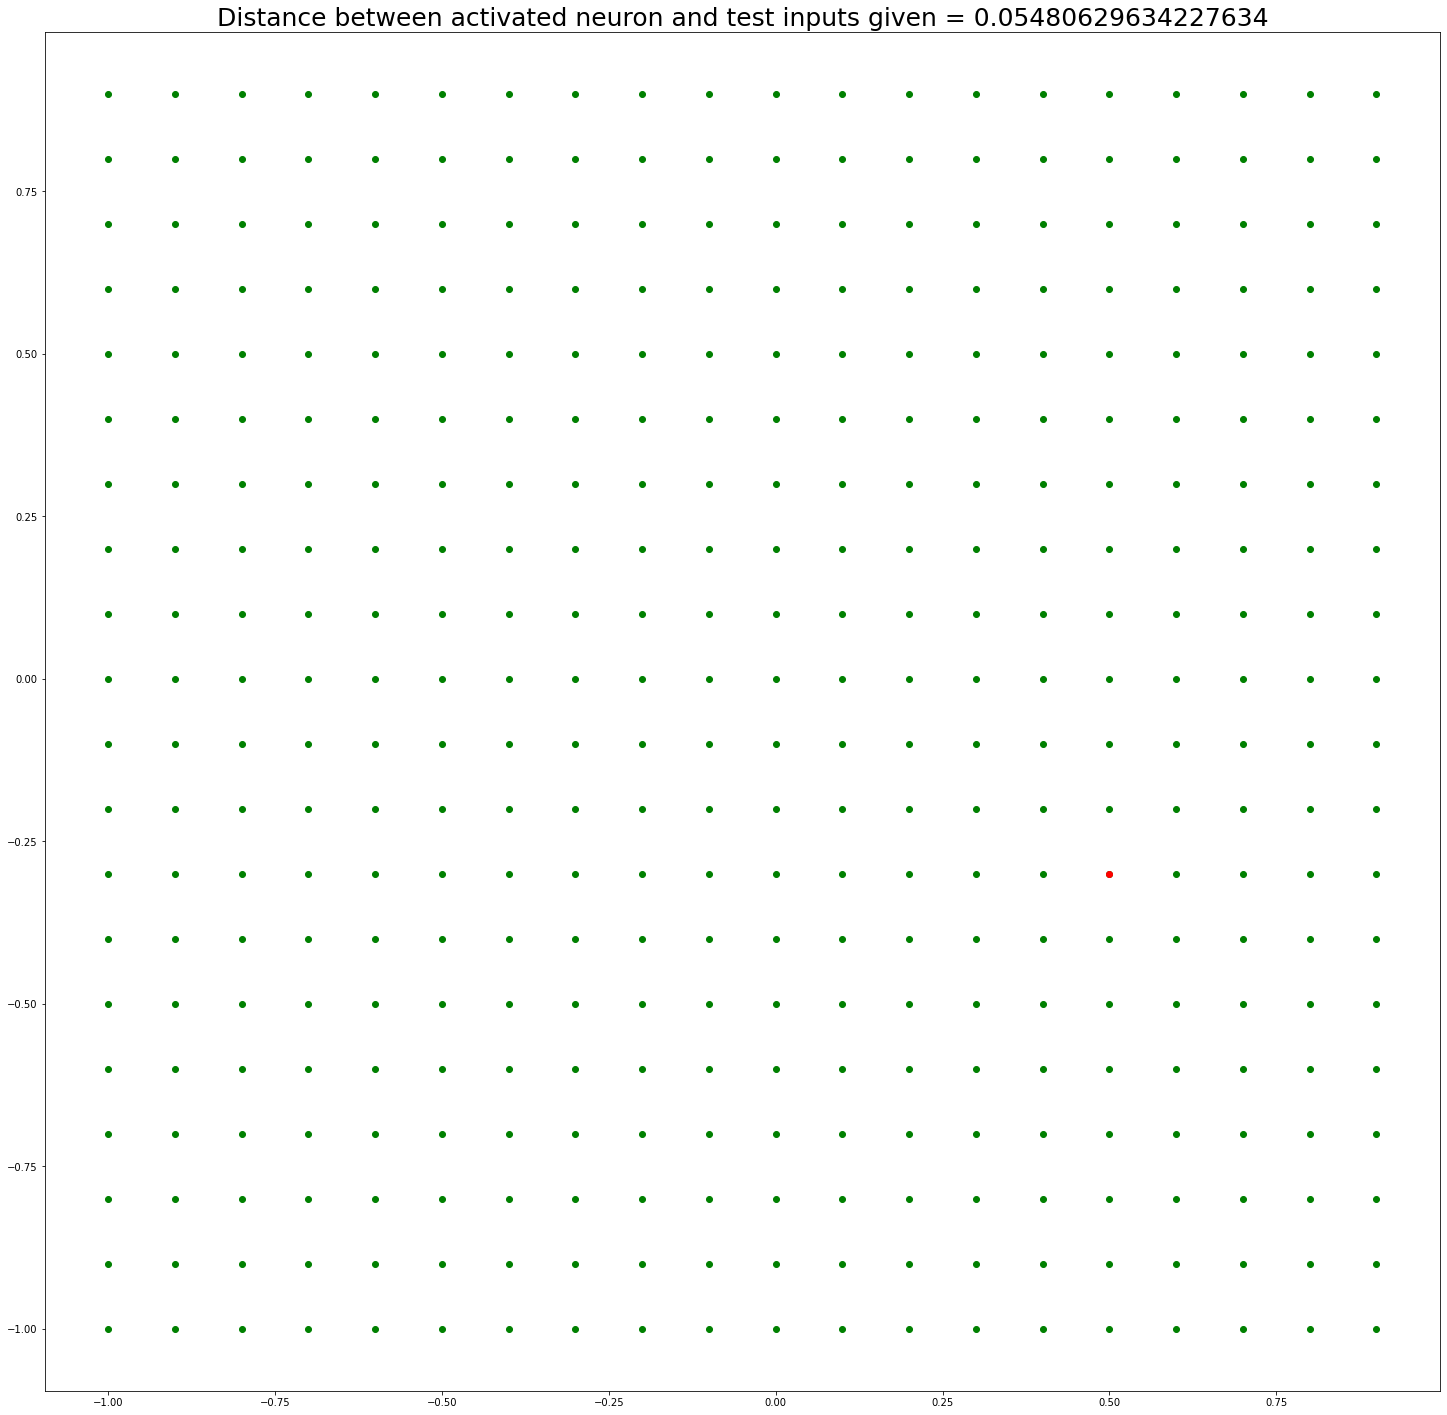

********For input 2 Minimum Euclidian distance is : 0.057675019895627636********
*********************The cluster it belongs to is :(0, 0)**********************



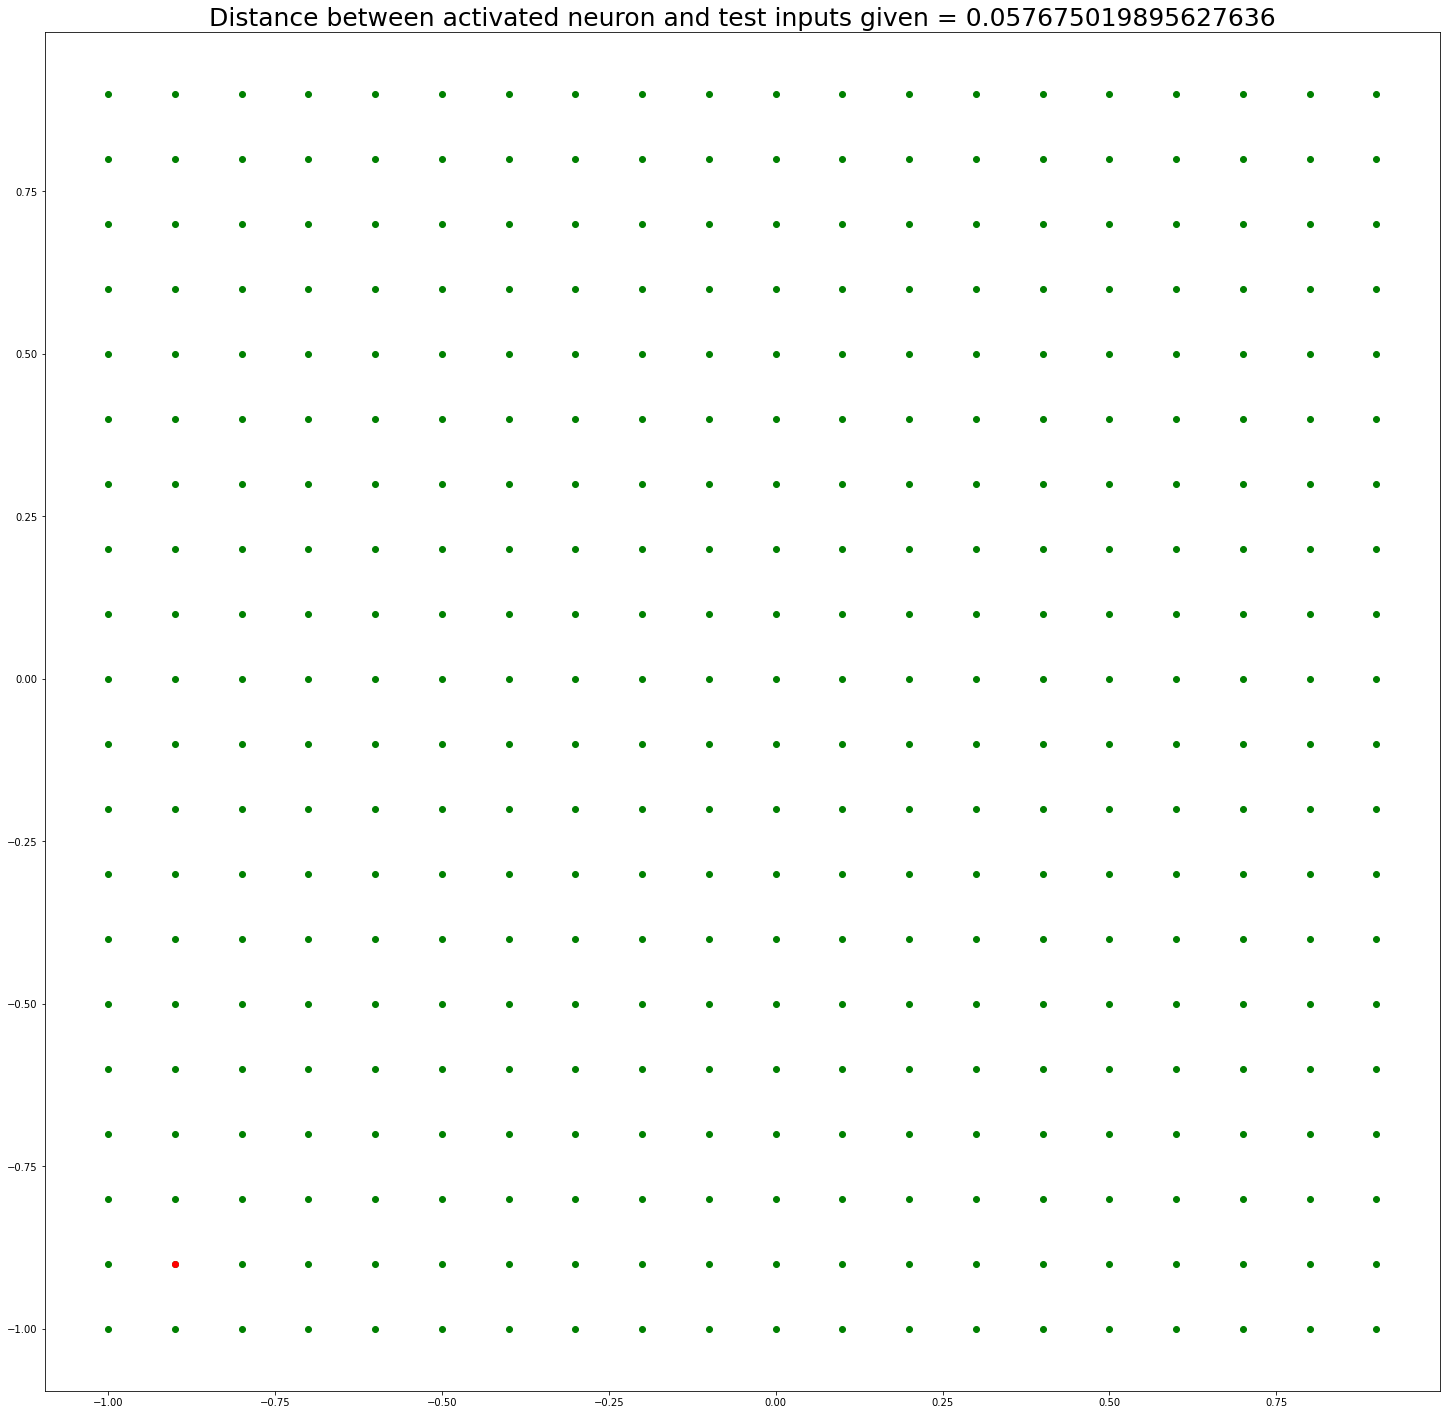

********For input 3 Minimum Euclidian distance is : 0.10613112086609924********
*********************The cluster it belongs to is :(9, 1)**********************



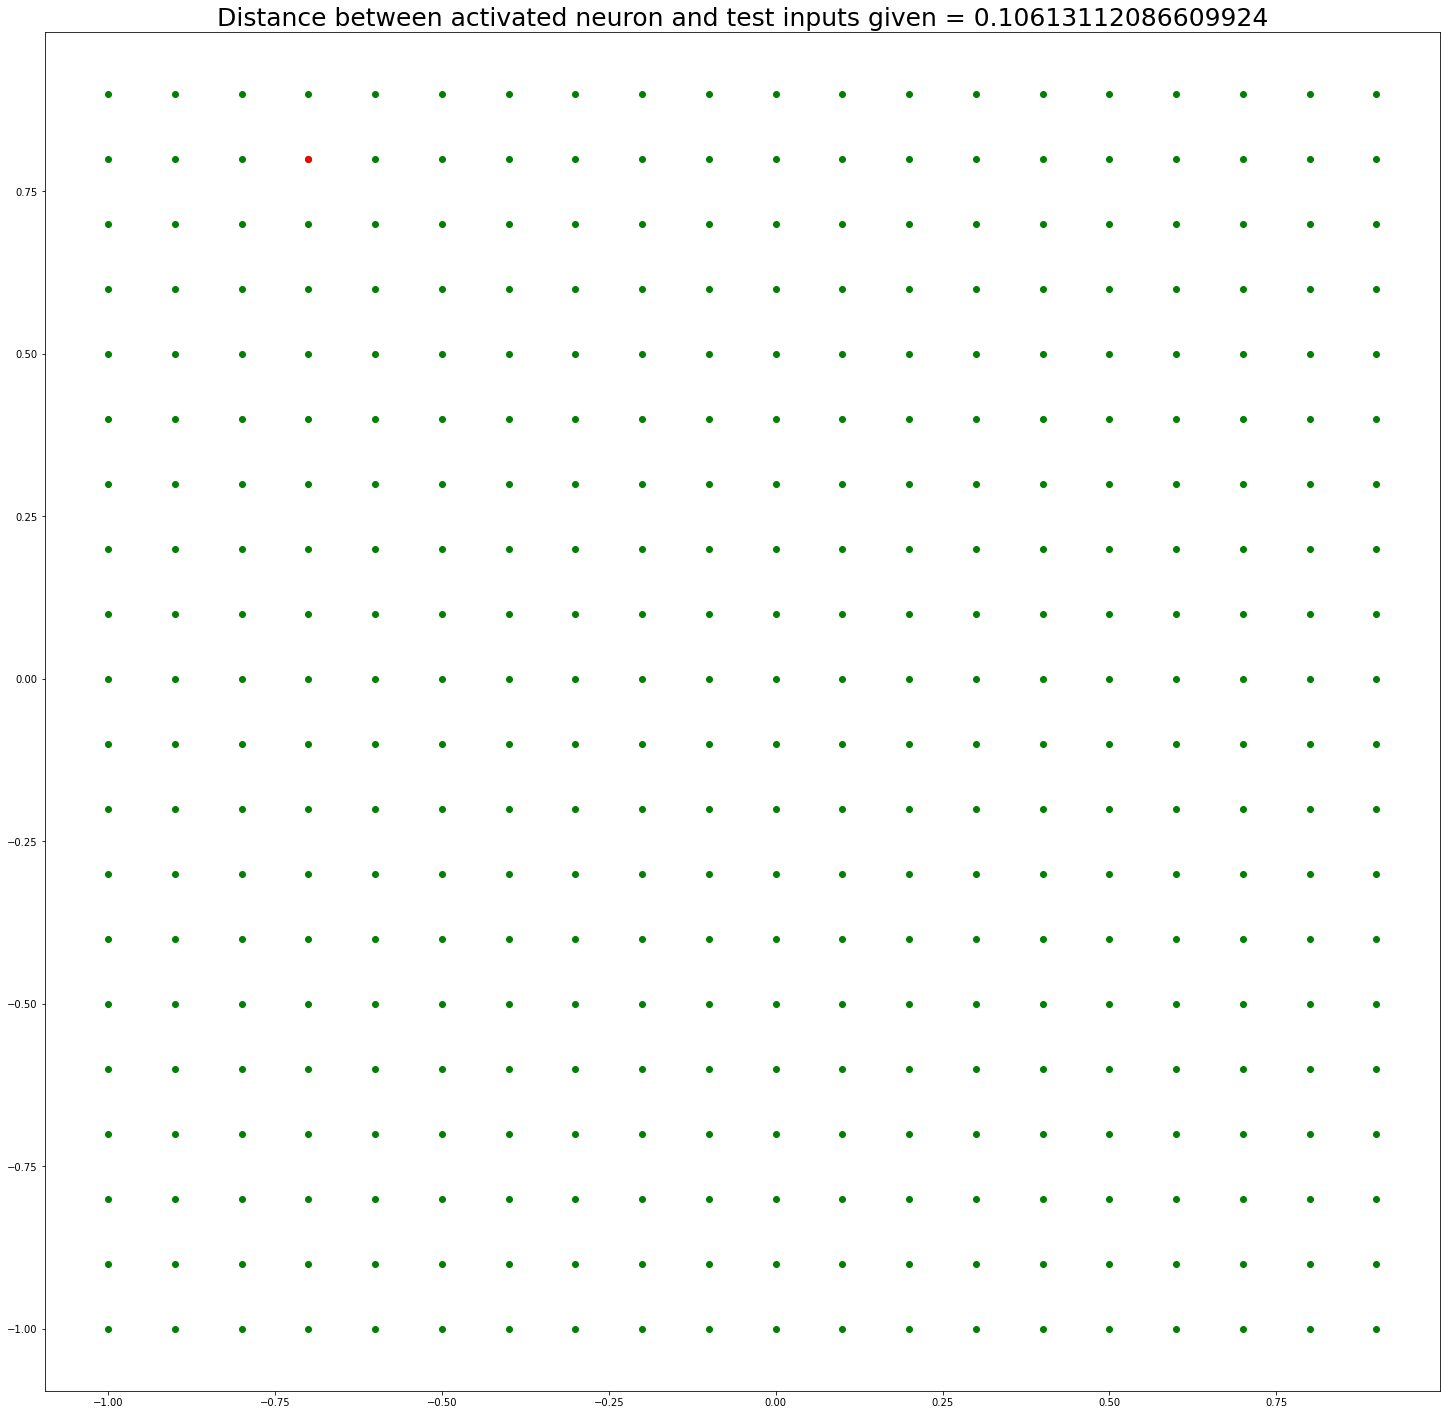

In [11]:
testingSet = np.array([[0.1, 0.8], [0.5, -0.2], [-0.8, -0.9], [-0.6, 0.9]])

for i in range(testingSet.shape[0]):
  testSample = testingSet[i,:]
  winnerVector = winningVector(testSample)
  inputData = testingSet[i]

  #Calculation of Best Matching Unit
  bestMatchingUnitList = []
  r = W.shape[0]
  c = W.shape[1]

  for a in range(r):
    for b in range(c):
      dist = np.linalg.norm((inputData - W[a,b]))
      bestMatchingUnitList.append(((a,b),dist))

  bestMatchingUnitList.sort(key=lambda x:x[1])
  minBMU = bestMatchingUnitList[0][0]
  print('********For input '+str(i)+' Minimum Euclidian distance is : '+str(bestMatchingUnitList[0][1])+'********')
  print('*********************The cluster it belongs to is :'+str(minBMU)+'**********************\n')

  plotX = np.arange(-1,1,0.1)
  plotY = np.arange(-1,1,0.1)
  xGrid,yGrid = np.meshgrid(plotX,plotY)

  xCoordi = W[winnerVector[0]][winnerVector[1]][0]
  yCoordi = W[winnerVector[0]][winnerVector[1]][1]
  distance = math.sqrt((xCoordi - testSample[0])**2 + (yCoordi - testSample[1])**2)
  xCoordi = round(xCoordi,1)
  yCoordi = round(yCoordi,1)

  plt.figure(figsize =(25, 25)) 
  plt.title("Distance between activated neuron and test inputs given = " + 
            str(distance), fontsize = 25) 
  plt.scatter(xGrid, yGrid, c = 'g') 
  plt.scatter(xCoordi, yCoordi, c = 'r') 
  plt.show() 
  plt.close() 

**The Nearest Neuron which is activated by the test input is shown with red color along with the Euclidean Distances between Activated Neurons and Test Inputs.**